# Import IG data

In [161]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

ig_df = pd.read_csv('aggr_ig_df_v2.csv')
ig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   account_id                 1010 non-null   int64  
 1   total_num_post             1010 non-null   int64  
 2   q1                         1010 non-null   float64
 3   q2                         1010 non-null   float64
 4   q3                         1010 non-null   float64
 5   q4                         1010 non-null   float64
 6   monday                     1010 non-null   float64
 7   tuesday                    1010 non-null   float64
 8   wednesday                  1010 non-null   float64
 9   thursday                   1010 non-null   float64
 10  friday                     1010 non-null   float64
 11  saturday                   1010 non-null   float64
 12  sunday                     1010 non-null   float64
 13  morning                    1010 non-null   float

# Analyse message length per post 
(tokenize แบบ longest matching สำหรับคำไทยโดยเฉพาะ)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c78ad71cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c78ad77400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c78ad71970>],
 'medians': [<matplotlib.lines.Line2D at 0x1c78ad77ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c78ad77e20>],
 'means': []}

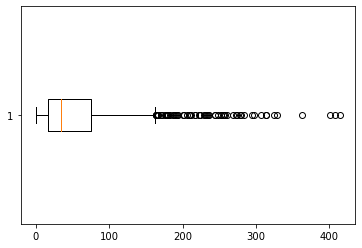

In [162]:
plt.boxplot(ig_df['message_length_per_post'], vert = False)

In [163]:
ig_df['message_length_per_post'].describe()

count    1010.000000
mean       56.550882
std        61.467044
min         0.000000
25%        16.859660
50%        33.912716
75%        74.972965
max       414.578947
Name: message_length_per_post, dtype: float64

# message length per post ยิ่งน้อย ยิ่งเพิ่มค่า engagement ratio per post

In [164]:
ig_df[ig_df['message_length_per_post'] <56.550882]['engagement_ratio_per_post'].describe()

count    686.000000
mean       0.098181
std        0.745661
min        0.000000
25%        0.015186
50%        0.032734
75%        0.068706
max       13.784173
Name: engagement_ratio_per_post, dtype: float64

In [165]:
ig_df[ig_df['message_length_per_post'] >56.550882]['engagement_ratio_per_post'].describe()

count    324.000000
mean       0.033376
std        0.063056
min        0.000000
25%        0.006051
50%        0.014668
75%        0.032752
max        0.679687
Name: engagement_ratio_per_post, dtype: float64

In [166]:
ig_df['engagement_ratio_per_post'].describe()

count    1010.000000
mean        0.077392
std         0.616165
min         0.000000
25%         0.011110
50%         0.025703
75%         0.058768
max        13.784173
Name: engagement_ratio_per_post, dtype: float64

In [167]:
ig_df[ig_df['message_length_per_post'] < 12]['message_length_per_post']

0       3.000000
2       8.769231
10      6.553191
22      4.950530
29      8.754505
          ...   
956     4.875000
980     6.217391
984     0.000000
996     7.252336
1004    5.000000
Name: message_length_per_post, Length: 153, dtype: float64

In [168]:
ig_df[ig_df['message_length_per_post'] < 12]['engagement_ratio_per_post'].count()

153

In [169]:
ig_df[ig_df['message_length_per_post'] > 12]['engagement_ratio_per_post'].count()

854

(array([325., 252., 131.,  80.,  51.,  56.,  37.,  17.,  12.,   9.,   8.,
          9.,   7.,   5.,   3.,   4.,   0.,   1.,   0.,   3.]),
 array([  0.        ,  20.72894737,  41.45789474,  62.18684211,
         82.91578947, 103.64473684, 124.37368421, 145.10263158,
        165.83157895, 186.56052632, 207.28947368, 228.01842105,
        248.74736842, 269.47631579, 290.20526316, 310.93421053,
        331.66315789, 352.39210526, 373.12105263, 393.85      ,
        414.57894737]),
 <BarContainer object of 20 artists>)

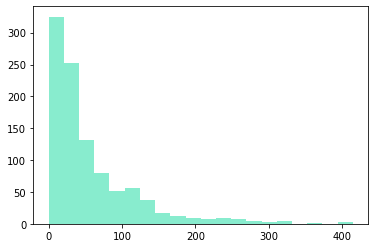

In [170]:
plt.hist(ig_df['message_length_per_post'], bins=20, alpha=0.5,color='#12DB9E')

(array([ 5.,  3.,  2.,  5.,  4.,  6.,  8.,  6.,  8.,  6., 13.,  4.,  8.,
        14., 10.,  8., 11.,  7., 14., 11.]),
 array([ 0.        ,  0.59642857,  1.19285714,  1.78928571,  2.38571429,
         2.98214286,  3.57857143,  4.175     ,  4.77142857,  5.36785714,
         5.96428571,  6.56071429,  7.15714286,  7.75357143,  8.35      ,
         8.94642857,  9.54285714, 10.13928571, 10.73571429, 11.33214286,
        11.92857143]),
 <BarContainer object of 20 artists>)

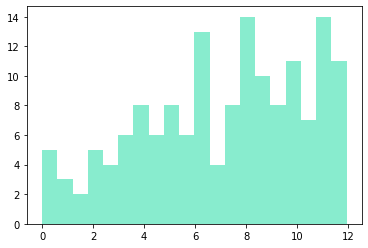

In [171]:
plt.hist(ig_df[ig_df['message_length_per_post'] < 12]['message_length_per_post'], bins=20, alpha=0.5,color='#12DB9E')

# Find relationship between message length per post and engagement ratio per post

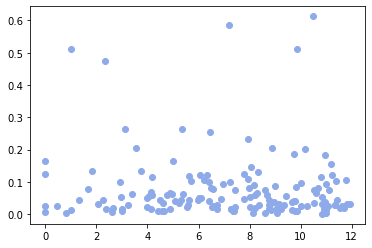

In [172]:
plt.scatter(ig_df[ig_df['message_length_per_post'] < 12]['message_length_per_post'], ig_df[ig_df['message_length_per_post'] < 12]['engagement_ratio_per_post'],color='#8EAAE8')

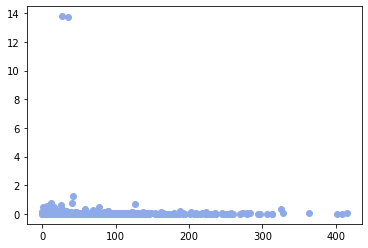

In [173]:
plt.scatter(ig_df['message_length_per_post'], ig_df['engagement_ratio_per_post'],color='#8EAAE8')

# After removing the outlier

(array([681.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 0.        ,  0.68920865,  1.37841731,  2.06762596,  2.75683461,
         3.44604327,  4.13525192,  4.82446057,  5.51366923,  6.20287788,
         6.89208653,  7.58129519,  8.27050384,  8.95971249,  9.64892115,
        10.3381298 , 11.02733845, 11.71654711, 12.40575576, 13.09496441,
        13.78417307]),
 <BarContainer object of 20 artists>)

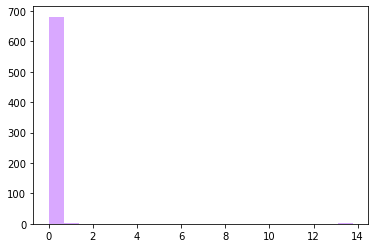

In [174]:
plt.hist(ig_df[ig_df['message_length_per_post'] <  56.550882]['engagement_ratio_per_post'],bins=20, alpha=0.5,color='#b452ff')

(array([243.,  40.,  23.,   4.,   5.,   3.,   1.,   0.,   1.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.03398437, 0.06796874, 0.10195312, 0.13593749,
        0.16992186, 0.20390623, 0.2378906 , 0.27187498, 0.30585935,
        0.33984372, 0.37382809, 0.40781247, 0.44179684, 0.47578121,
        0.50976558, 0.54374995, 0.57773433, 0.6117187 , 0.64570307,
        0.67968744]),
 <BarContainer object of 20 artists>)

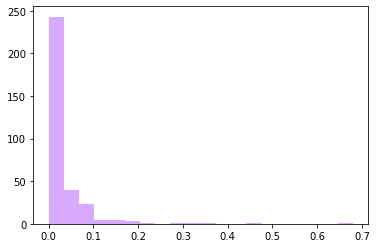

In [175]:
plt.hist(ig_df[ig_df['message_length_per_post'] >  56.550882]['engagement_ratio_per_post'],bins=20, alpha=0.5,color='#b452ff')

#  Find relationship between message length per post and percent change fan

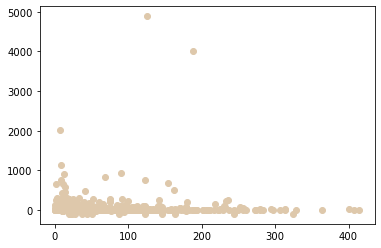

In [176]:
plt.scatter(ig_df['message_length_per_post'], ig_df['percent_change_fan'],color='#dec8ab')

(array([128.,  14.,   4.,   1.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -23.94713912,   78.51360538,  180.97434988,  283.43509438,
         385.89583888,  488.35658338,  590.81732788,  693.27807238,
         795.73881688,  898.19956138, 1000.66030588, 1103.12105039,
        1205.58179489, 1308.04253939, 1410.50328389, 1512.96402839,
        1615.42477289, 1717.88551739, 1820.34626189, 1922.80700639,
        2025.26775089]),
 <BarContainer object of 20 artists>)

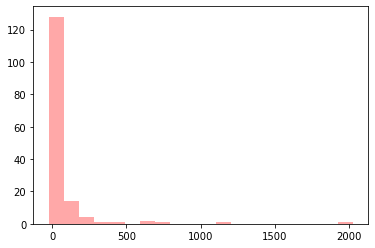

In [177]:
plt.hist(ig_df[ig_df['message_length_per_post'] < 12]['percent_change_fan'],bins=20, alpha=0.5,color='#ff5252')

# Find relationship between engagement per post and percent change fan

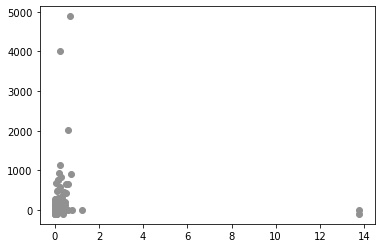

In [178]:
num_days = ig_df['total_num_post'] /ig_df['posts_per_day']
change_fan_total = ig_df['change_fan_per_day'] * num_days

plt.scatter(ig_df['engagement_ratio_per_post'],ig_df['percent_change_fan'],color='#919191')

In [179]:
ig_q1 = ig_df["q1"] * ig_df["total_num_post"] / 90
ig_q2 = ig_df["q2"] * ig_df["total_num_post"] / 90
ig_q3 = ig_df["q3"] * ig_df["total_num_post"] / 90
ig_q4 = ig_df["q4"] * ig_df["total_num_post"] / 90

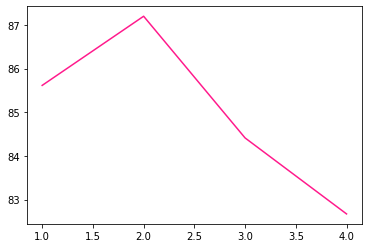

In [180]:
plt.plot([1, 2, 3, 4], [ig_q1.mean(), ig_q2.mean(), ig_q3.mean(), ig_q4.mean()],color='#ff1a8c')

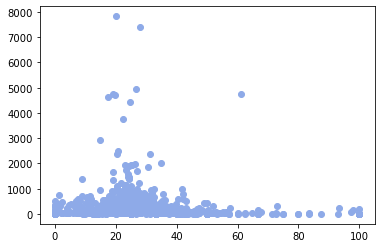

In [181]:
plt.scatter(ig_df['q1'], ig_df['total_num_post'],color='#8EAAE8')

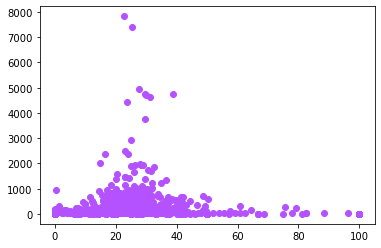

In [182]:
plt.scatter(ig_df['q2'], ig_df['total_num_post'],color='#b452ff')

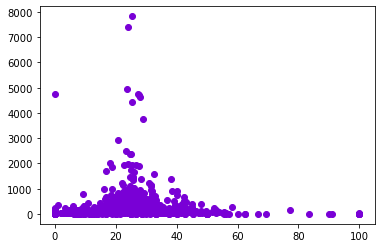

In [183]:
plt.scatter(ig_df['q3'], ig_df['total_num_post'],color='#7900d6')

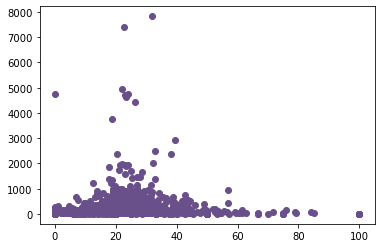

In [184]:
plt.scatter(ig_df['q4'], ig_df['total_num_post'],color='#69508A')

In [185]:
ig_days = ig_df['monday'],ig_df['tuesday'],ig_df['wednesday'],ig_df['thursday'],ig_df['friday'],ig_df['saturday'],ig_df['sunday']

In [186]:
ig_days

(0        0.000000
 1       13.054830
 2       25.641026
 3       10.290237
 4       11.814346
           ...    
 1005    14.285714
 1006    14.754098
 1007    16.027875
 1008    12.280702
 1009    11.494253
 Name: monday, Length: 1010, dtype: float64,
 0       100.000000
 1        13.838120
 2        20.512821
 3        15.303430
 4        15.611814
            ...    
 1005     14.285714
 1006     11.885246
 1007     13.588850
 1008     13.450292
 1009      8.045977
 Name: tuesday, Length: 1010, dtype: float64,
 0        0.000000
 1       13.838120
 2       12.820513
 3       14.511873
 4       13.924051
           ...    
 1005    14.285714
 1006    12.704918
 1007    11.846690
 1008    15.789474
 1009    19.540230
 Name: wednesday, Length: 1010, dtype: float64,
 0        0.000000
 1       17.232376
 2        7.692308
 3       15.831135
 4       16.455696
           ...    
 1005     2.857143
 1006    16.393443
 1007    15.679443
 1008    19.883041
 1009    33.333333
 Name: thursda

In [187]:
ig_period = ig_df['morning'], ig_df['afternoon'],ig_df['evening'],ig_df['night']
ig_period

(0        0.000000
 1       18.798956
 2       23.076923
 3       32.981530
 4       13.080169
           ...    
 1005     5.714286
 1006     6.557377
 1007     1.393728
 1008    23.391813
 1009    21.839080
 Name: morning, Length: 1010, dtype: float64,
 0        0.000000
 1       46.475196
 2       53.846154
 3       62.532982
 4       54.852321
           ...    
 1005    68.571429
 1006    55.737705
 1007    56.445993
 1008    60.233918
 1009    47.126437
 Name: afternoon, Length: 1010, dtype: float64,
 0       100.000000
 1        34.725849
 2        15.384615
 3         4.485488
 4        29.957806
            ...    
 1005     20.000000
 1006     37.295082
 1007     40.069686
 1008     15.789474
 1009     26.436782
 Name: evening, Length: 1010, dtype: float64,
 0       0.000000
 1       0.000000
 2       7.692308
 3       0.000000
 4       2.109705
           ...   
 1005    5.714286
 1006    0.409836
 1007    2.090592
 1008    0.584795
 1009    4.597701
 Name: night, Length: 10

# Import Facebook Data

In [188]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

fb_df = pd.read_csv('aggr_fb_df_v2.csv')

In [189]:
fb_df['engagement_ratio_per_post'].describe()

count    2084.000000
mean        0.011688
std         0.050408
min         0.000000
25%         0.000875
50%         0.003179
75%         0.009061
max         1.594128
Name: engagement_ratio_per_post, dtype: float64

In [190]:
fb_q1 = fb_df["q1"] * fb_df["total_num_post"] / 90
fb_q2 = fb_df["q2"] * fb_df["total_num_post"] / 90
fb_q3 = fb_df["q3"] * fb_df["total_num_post"] / 90
fb_q4 = fb_df["q4"] * fb_df["total_num_post"] / 90

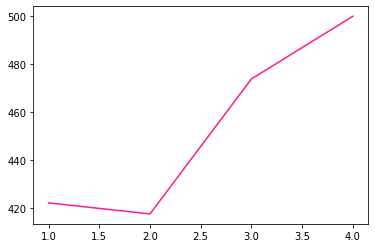

In [191]:
plt.plot([1, 2, 3, 4], [fb_q1.mean(), fb_q2.mean(), fb_q3.mean(), fb_q4.mean()],color='#ff1a8c')

# Compare Facebook and Instragram

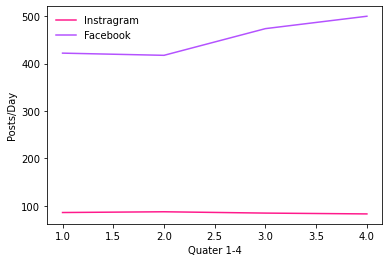

In [192]:
ax=plt.subplot()
ax.set_xlabel('Quater 1-4')
ax.set_ylabel('Posts/Day')
plt.plot([1, 2, 3, 4], [ig_q1.mean(), ig_q2.mean(), ig_q3.mean(), ig_q4.mean()],color='#ff1a8c',label='Instragram')
plt.plot([1, 2, 3, 4], [fb_q1.mean(), fb_q2.mean(), fb_q3.mean(), fb_q4.mean()],color='#b452ff',label='Facebook')
plt.legend(frameon=False)

In [193]:
fb_days = fb_df['monday'],fb_df['tuesday'],fb_df['wednesday'],fb_df['thursday'],fb_df['friday'],fb_df['saturday'],fb_df['sunday']

In [194]:
print(fb_days)

(0       13.803293
1       53.564155
2       12.342216
3        8.423493
4        9.536424
          ...    
2079    15.484805
2080     0.000000
2081     0.000000
2082     9.090909
2083     2.941176
Name: monday, Length: 2084, dtype: float64, 0       14.014352
1       14.867617
2       15.147265
3       11.591963
4        8.741722
          ...    
2079    12.301013
2080    13.043478
2081     0.000000
2082     9.090909
2083     5.882353
Name: tuesday, Length: 2084, dtype: float64, 0       13.423385
1        7.331976
2        8.835905
3       14.142195
4        9.271523
          ...    
2079    14.037627
2080    39.130435
2081     0.000000
2082     9.090909
2083    35.294118
Name: wednesday, Length: 2084, dtype: float64, 0       13.085690
1        3.462322
2       19.915849
3       14.837713
4       11.258278
          ...    
2079    11.432706
2080     0.000000
2081     0.000000
2082    54.545455
2083     0.000000
Name: thursday, Length: 2084, dtype: float64, 0        13.381173
1     

In [195]:
ig_df['total_num_post'].mean()

305.90891089108914

In [196]:
fb_df['total_num_post'].mean()

1632.207773512476

In [197]:
ig_df['account_id'].count()

1010

In [198]:
fb_df['account_id'].count()

2084

<BarContainer object of 2 artists>

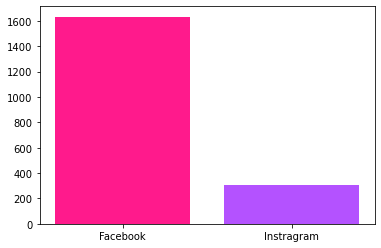

In [199]:
plt.bar (['Facebook','Instragram'], [1632.207773512476,305.90891089108914],color=['#ff1a8c','#b452ff'])

# Import Twitter Data

In [200]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

tw_df = pd.read_csv('twitter_v2.csv')
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 504 non-null    int64  
 1   account_id                 504 non-null    int64  
 2   total_num_post             504 non-null    int64  
 3   q1                         504 non-null    float64
 4   q2                         504 non-null    float64
 5   q3                         504 non-null    float64
 6   q4                         504 non-null    float64
 7   monday                     504 non-null    float64
 8   tuesday                    504 non-null    float64
 9   wednesday                  504 non-null    float64
 10  thursday                   504 non-null    float64
 11  friday                     504 non-null    float64
 12  saturday                   504 non-null    float64
 13  sunday                     504 non-null    float64

In [201]:
tw_df['total_num_post'].mean()

502.56944444444446

# Import Youtube Data

In [202]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

yt_df = pd.read_csv('yt_v4_after_midterm.csv')
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1031 non-null   int64  
 1   account_id                 1031 non-null   object 
 2   total_num_post             1031 non-null   int64  
 3   q1                         1031 non-null   float64
 4   q2                         1031 non-null   float64
 5   q3                         1031 non-null   float64
 6   q4                         1031 non-null   float64
 7   monday                     1031 non-null   float64
 8   tuesday                    1031 non-null   float64
 9   wednesday                  1031 non-null   float64
 10  thursday                   1031 non-null   float64
 11  friday                     1031 non-null   float64
 12  saturday                   1031 non-null   float64
 13  sunday                     1031 non-null   float

In [203]:
yt_df['total_num_post'].mean()

119.74296799224054

# All Platforms

<BarContainer object of 4 artists>

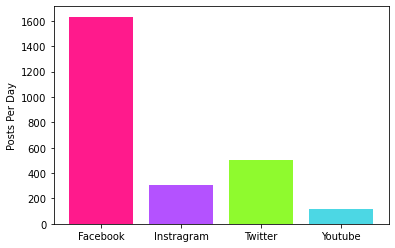

In [204]:
ax=plt.subplot()
ax.set_ylabel('Posts Per Day')
plt.bar (['Facebook','Instragram','Twitter','Youtube'], [1632.207773512476,305.90891089108914,502.56944444444446,119.74296799224054],color=['#ff1a8c','#b452ff','#8ffa2e','#4cd7e4'])

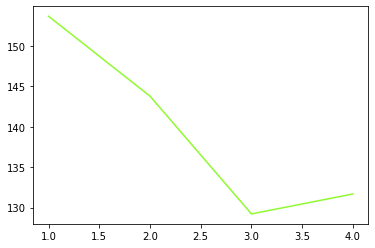

In [205]:
tw_q1 = tw_df["q1"] * tw_df["total_num_post"] / 90
tw_q2 = tw_df["q2"] * tw_df["total_num_post"] / 90
tw_q3 = tw_df["q3"] * tw_df["total_num_post"] / 90
tw_q4 = tw_df["q4"] * tw_df["total_num_post"] / 90
plt.plot([1, 2, 3, 4], [tw_q1.mean(), tw_q2.mean(), tw_q3.mean(), tw_q4.mean()],color='#8ffa2e')

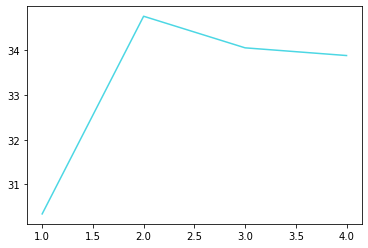

In [206]:
yt_q1 = yt_df["q1"] * yt_df["total_num_post"] / 90
yt_q2 = yt_df["q2"] * yt_df["total_num_post"] / 90
yt_q3 = yt_df["q3"] * yt_df["total_num_post"] / 90
yt_q4 = yt_df["q4"] * yt_df["total_num_post"] / 90
plt.plot([1, 2, 3, 4], [yt_q1.mean(), yt_q2.mean(), yt_q3.mean(), yt_q4.mean()],color='#4cd7e4')

# Graph for All Platforms

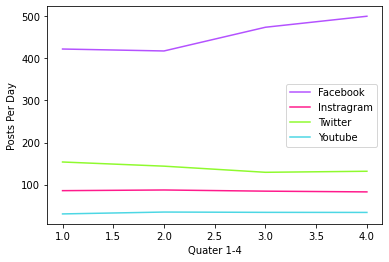

In [207]:
fig, ax = plt.subplots(figsize =(6,4))
ax.set_xlabel('Quater 1-4')
ax.set_ylabel('Posts Per Day')
plt.plot([1, 2, 3, 4], [fb_q1.mean(), fb_q2.mean(), fb_q3.mean(), fb_q4.mean()],color='#b452ff',label='Facebook')
plt.plot([1, 2, 3, 4], [ig_q1.mean(), ig_q2.mean(), ig_q3.mean(), ig_q4.mean()],color='#ff1a8c',label='Instragram')
plt.plot([1, 2, 3, 4], [tw_q1.mean(), tw_q2.mean(), tw_q3.mean(), tw_q4.mean()],color='#8ffa2e',label ='Twitter')
plt.plot([1, 2, 3, 4], [yt_q1.mean(), yt_q2.mean(), yt_q3.mean(), yt_q4.mean()],color='#4cd7e4',label='Youtube')
plt.legend(frameon=True)

In [208]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   account_id                      2084 non-null   int64  
 1   total_num_post                  2084 non-null   int64  
 2   q1                              2084 non-null   float64
 3   q2                              2084 non-null   float64
 4   q3                              2084 non-null   float64
 5   q4                              2084 non-null   float64
 6   monday                          2084 non-null   float64
 7   tuesday                         2084 non-null   float64
 8   wednesday                       2084 non-null   float64
 9   thursday                        2084 non-null   float64
 10  friday                          2084 non-null   float64
 11  saturday                        2084 non-null   float64
 12  sunday                          20

In [209]:
fb_df['posts_per_day'].mean()           
fb_df['loves_per_post'].mean()                   
fb_df['likes_per_post'].mean()        
fb_df['wows_per_post'].mean()       
fb_df['hahas_per_post'].mean()      
fb_df['angrys_per_post'].mean()       
fb_df['sads_per_post'].mean()      
fb_df['comments_per_post'].mean()             
fb_df['shares_per_post'].mean()        

3259.4282335895145

In [210]:
fb_df['posts_per_day'].mean()  

5.591260145607037

In [211]:
fb_df['loves_per_post'].mean()   

838.5103425409113

In [212]:
fb_df['likes_per_post'].mean()

18286.715628339585

In [213]:
fb_df['wows_per_post'].mean()     

156.7461297058913

In [214]:
fb_df['hahas_per_post'].mean()  

854.4478555660166

In [215]:
fb_df['angrys_per_post'].mean()   

38.14265155383625

In [216]:
fb_df['sads_per_post'].mean()     

112.34009788032749

In [217]:
fb_df['comments_per_post'].mean()        

1108.2438071587637

In [218]:
fb_df['shares_per_post'].mean()   

3259.4282335895145

2084

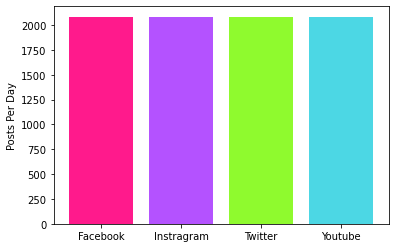

In [219]:
ax=plt.subplot()
ax.set_ylabel('Posts Per Day')
plt.bar (['Facebook','Instragram','Twitter','Youtube'], [2084,2084,2084,2084],color=['#ff1a8c','#b452ff','#8ffa2e','#4cd7e4'])
fb_df['total_num_post'].count()

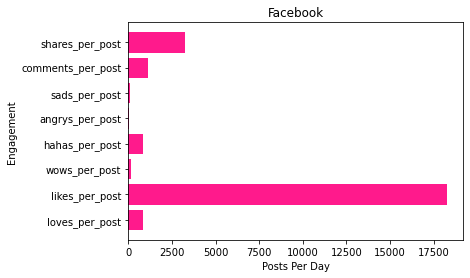

In [220]:
data_x = ['loves_per_post','likes_per_post','wows_per_post','hahas_per_post','angrys_per_post','sads_per_post','comments_per_post','shares_per_post']
data_y = [838.5103425409113,18286.715628339585,156.7461297058913,854.4478555660166,38.14265155383625,112.34009788032749,1108.2438071587637,3259.4282335895145]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Facebook')
plt.barh(data_x, data_y, color='#ff1a8c')
plt.show()

In [221]:
ig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   account_id                 1010 non-null   int64  
 1   total_num_post             1010 non-null   int64  
 2   q1                         1010 non-null   float64
 3   q2                         1010 non-null   float64
 4   q3                         1010 non-null   float64
 5   q4                         1010 non-null   float64
 6   monday                     1010 non-null   float64
 7   tuesday                    1010 non-null   float64
 8   wednesday                  1010 non-null   float64
 9   thursday                   1010 non-null   float64
 10  friday                     1010 non-null   float64
 11  saturday                   1010 non-null   float64
 12  sunday                     1010 non-null   float64
 13  morning                    1010 non-null   float

In [222]:
ig_df['likes_per_post'].mean()    

3632.2649689090886

In [223]:
ig_df['comments_per_post'].mean()    

17.630214592459

In [224]:
ig_df['views_per_post'].mean()    

2746.4724200474916

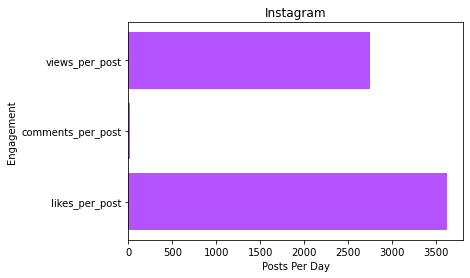

In [225]:
data_x = ['likes_per_post','comments_per_post','views_per_post']
data_y = [3632.2649689090886,17.630214592459,2746.4724200474916]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Instagram')
plt.barh(data_x, data_y, color='#b452ff')
plt.show()

In [226]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 504 non-null    int64  
 1   account_id                 504 non-null    int64  
 2   total_num_post             504 non-null    int64  
 3   q1                         504 non-null    float64
 4   q2                         504 non-null    float64
 5   q3                         504 non-null    float64
 6   q4                         504 non-null    float64
 7   monday                     504 non-null    float64
 8   tuesday                    504 non-null    float64
 9   wednesday                  504 non-null    float64
 10  thursday                   504 non-null    float64
 11  friday                     504 non-null    float64
 12  saturday                   504 non-null    float64
 13  sunday                     504 non-null    float64

In [227]:
tw_df['favorite_ratio_per_post'].mean()   

0.6657827459521637

In [228]:
tw_df['reply_per_post'].mean()   

4.0752731084063125

In [229]:
tw_df['retweet_per_post'].mean()   

413.80039772000856

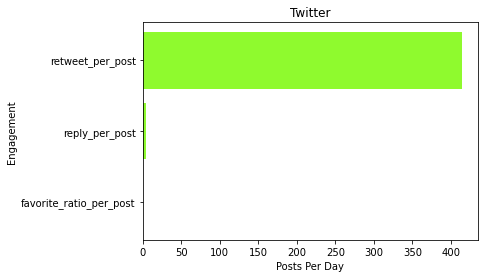

In [230]:
data_x = ['favorite_ratio_per_post','reply_per_post','retweet_per_post']
data_y = [0.6657827459521637,4.0752731084063125, 413.80039772000856]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Twitter')
plt.barh(data_x, data_y, color='#8ffa2e')
plt.show()

In [231]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1031 non-null   int64  
 1   account_id                 1031 non-null   object 
 2   total_num_post             1031 non-null   int64  
 3   q1                         1031 non-null   float64
 4   q2                         1031 non-null   float64
 5   q3                         1031 non-null   float64
 6   q4                         1031 non-null   float64
 7   monday                     1031 non-null   float64
 8   tuesday                    1031 non-null   float64
 9   wednesday                  1031 non-null   float64
 10  thursday                   1031 non-null   float64
 11  friday                     1031 non-null   float64
 12  saturday                   1031 non-null   float64
 13  sunday                     1031 non-null   float

In [232]:
yt_df['likes_per_post'].mean()   

3118.5637869593324

In [233]:
yt_df['dislikes_per_post'].mean()   

97.24592067874211

In [234]:
yt_df['dislikes_per_post'].mean()  

97.24592067874211

In [235]:
yt_df['views_per_post'].mean()   

113489.51479862096

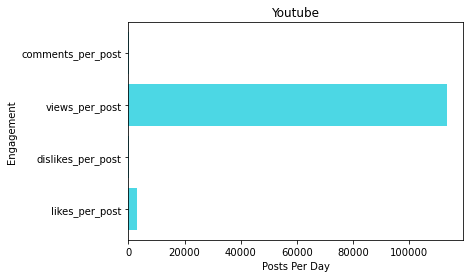

In [236]:
data_x = ['likes_per_post','dislikes_per_post','views_per_post','comments_per_post']
data_y = [3118.5637869593324, 97.24592067874211, 113489.51479862096, 166.60798558498664]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Youtube')
plt.barh(data_x, data_y, color='#4cd7e4')
plt.show()

# Engagement per Post by Categories

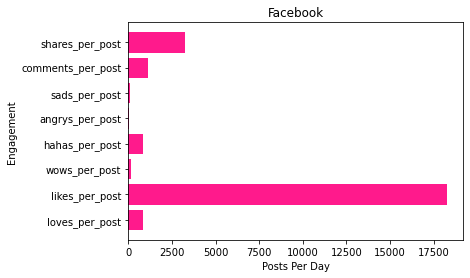

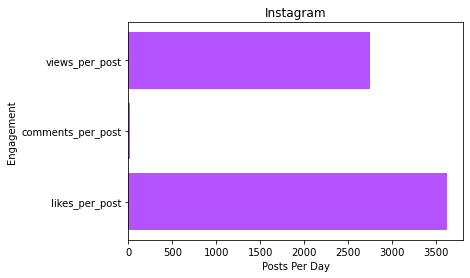

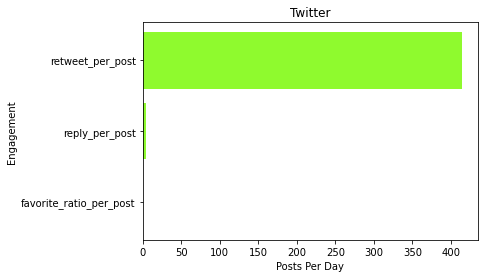

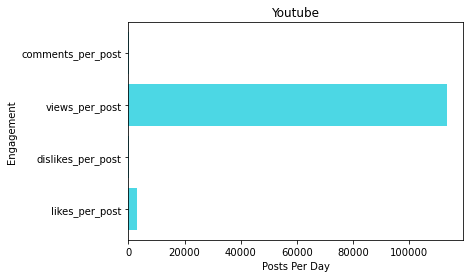

In [237]:
data_x = ['loves_per_post','likes_per_post','wows_per_post','hahas_per_post','angrys_per_post','sads_per_post','comments_per_post','shares_per_post']
data_y = [838.5103425409113,18286.715628339585,156.7461297058913,854.4478555660166,38.14265155383625,112.34009788032749,1108.2438071587637,3259.4282335895145]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Facebook')
plt.barh(data_x, data_y, color='#ff1a8c')
plt.show()

data_x = ['likes_per_post','comments_per_post','views_per_post']
data_y = [3632.2649689090886,17.630214592459,2746.4724200474916]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Instagram')
plt.barh(data_x, data_y, color='#b452ff')
plt.show()

data_x = ['favorite_ratio_per_post','reply_per_post','retweet_per_post']
data_y = [0.6657827459521637,4.0752731084063125, 413.80039772000856]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Twitter')
plt.barh(data_x, data_y, color='#8ffa2e')
plt.show()

data_x = ['likes_per_post','dislikes_per_post','views_per_post','comments_per_post']
data_y = [3118.5637869593324, 97.24592067874211, 113489.51479862096, 166.60798558498664]

plt.xlabel('Posts Per Day')
plt.ylabel('Engagement')
plt.title('Youtube')
plt.barh(data_x, data_y, color='#4cd7e4')
plt.show()

# Analyse Engagement Ratio by finding greater and lesser than mean

In [238]:
fb_df['engagement_ratio_per_post'].mean()

0.011688048199625219

# Facebook

In [239]:
fb_greater_mean = fb_df[fb_df['engagement_ratio_per_post'] >= 0.011688048199625219]
fb_lesser_mean = fb_df[fb_df['engagement_ratio_per_post'] < 0.011688048199625219]

In [240]:
len(fb_greater_mean['engagement_ratio_per_post'])

414

In [241]:
len(fb_lesser_mean['engagement_ratio_per_post'])

1670

# Instagram

In [242]:
ig_df['engagement_ratio_per_post'].mean()

0.0773923055439263

In [243]:
ig_greater_mean = ig_df[ig_df['engagement_ratio_per_post'] >= 0.0773923055439263]
ig_lesser_mean = ig_df[ig_df['engagement_ratio_per_post'] < 0.0773923055439263]

In [244]:
len(ig_greater_mean['engagement_ratio_per_post'])

173

In [245]:
len(ig_lesser_mean['engagement_ratio_per_post'])

837

# Twitter

In [246]:
tw_df['engagement_ratio_per_post'].mean()

1.8341885045694142

In [247]:
tw_greater_mean = tw_df[tw_df['engagement_ratio_per_post'] >= 1.8341885045694142]

In [248]:
tw_lesser_mean = tw_df[tw_df['engagement_ratio_per_post'] < 1.8341885045694142]

In [249]:
len(tw_greater_mean['engagement_ratio_per_post'])

13

In [250]:
len(tw_lesser_mean['engagement_ratio_per_post'])

490

# Youtube

In [251]:
yt_df['engagement_ratio_per_post'].mean()

inf

In [252]:
yt_greater_mean = yt_df[yt_df['engagement_ratio_per_post'] >= yt_df['engagement_ratio_per_post'].mean()]
yt_lesser_mean = yt_df[yt_df['engagement_ratio_per_post'] < yt_df['engagement_ratio_per_post'].mean()]

In [253]:
len(yt_greater_mean['engagement_ratio_per_post'])

16

In [254]:
len(yt_lesser_mean['engagement_ratio_per_post'])

1015

# Engagement Ratio for all Platforms

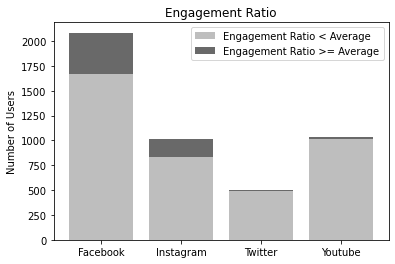

In [358]:
import matplotlib.pyplot as plt

x = ['Facebook', 'Instagram' ,'Twitter','Youtube']
y1 = [1670, 837,490,1015]
y2 = [414, 173 ,13,16]
# plot bars in stack manner
plt.bar(x, y1, color= '#bebebe')
plt.bar(x, y2, bottom=y1, color='#696969')

plt.ylabel('Number of Users')
plt.legend(['Engagement Ratio < Average','Engagement Ratio >= Average'])
plt.title('Engagement Ratio')
plt.show()

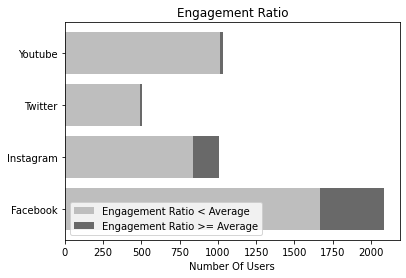

In [361]:
import matplotlib.pyplot as plt

Platforms = ['Facebook', 'Instagram' ,'Twitter','Youtube']
lessermean = [1670, 837,490,1015]
greatermean = [414, 173 ,13,16]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(Platforms , lessermean, color='#bebebe',label='Engagement Ratio < Average')
ax.barh(Platforms , greatermean , left=lessermean, color='#696969',label='Engagement Ratio >= Average')
ax.set_yticks(Platforms)
ax.set_xlabel('Number Of Users')
ax.set_title('Engagement Ratio')
leg = plt.legend( loc = 'best')
plt.show()

# Analyse Percent Change Fans by finding greater and lesser than mean

# Facebook

In [257]:
fb_df['percent_change_fan'].mean()   

15.972007206902688

In [268]:
fb_greater_mean = fb_df[fb_df['percent_change_fan'] >= 15.972007206902688]
fb_lesser_mean = fb_df[fb_df['percent_change_fan'] < 15.972007206902688]
fb_less_0 = fb_df[fb_df['percent_change_fan'] <0]

In [269]:
len(fb_greater_mean['percent_change_fan'])

446

In [270]:
len(fb_lesser_mean['percent_change_fan'])

1638

In [271]:
len(fb_less_0['percent_change_fan'])

325

# Instagram

In [258]:
ig_df['percent_change_fan'].mean()   

44.538777835149844

In [272]:
ig_greater_mean = ig_df[ig_df['percent_change_fan'] >= 44.538777835149844]
ig_lesser_mean = ig_df[ig_df['percent_change_fan'] < 44.538777835149844]
ig_less_0 = ig_df[ig_df['percent_change_fan'] <0]

In [273]:
len(ig_greater_mean['percent_change_fan'])

198

In [274]:
len(ig_lesser_mean['percent_change_fan'])

799

In [275]:
len(ig_less_0['percent_change_fan'])

137

# Twiter

In [259]:
tw_df['percent_change_fan'].mean()   

3958.010512544244

In [276]:
tw_greater_mean = tw_df[tw_df['percent_change_fan'] >= 3958.010512544244]
tw_lesser_mean = tw_df[tw_df['percent_change_fan'] < 3958.010512544244]
tw_less_0 = tw_df[tw_df['percent_change_fan'] <0]

In [277]:
len(tw_greater_mean['percent_change_fan'])

10

In [278]:
len(tw_lesser_mean['percent_change_fan'])

493

In [279]:
len(tw_less_0['percent_change_fan'])

62

# Youtube

In [160]:
yt_df['percent_change_fan'].mean()   

inf

In [307]:
yt_greater_mean = yt_df[yt_df['percent_change_fan'] >= yt_df['percent_change_fan'].mean()]
yt_lesser_mean = yt_df[yt_df['percent_change_fan'] < yt_df['percent_change_fan'].mean()]
yt_less_0 = yt_df[yt_df['percent_change_fan'] < 0]

In [311]:
len(yt_greater_mean['percent_change_fan'])

1

In [312]:
len(yt_lesser_mean['percent_change_fan'])

1018

In [313]:
len(yt_less_0['percent_change_fan'])

20

# Percentage Change in Fans for all catagories


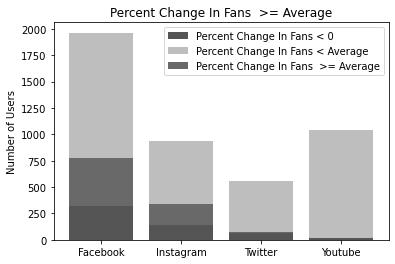

In [383]:
import matplotlib.pyplot as plt

x = ['Facebook', 'Instagram' ,'Twitter','Youtube']

y1 = [325,137,62,20 ]
y2 = [1638, 799,493,1018]
y3 = [446, 198 ,10,1]

plt.bar(x, y1, color= '#555555')
plt.bar(x, y2, bottom=y1, color='#bebebe')
plt.bar(x, y3, bottom=y1, color='#696969')

plt.ylabel('Number of Users')
plt.legend(['Percent Change In Fans < 0 ','Percent Change In Fans < Average','Percent Change In Fans  >= Average'])
plt.title('Percent Change In Fans  >= Average')
plt.show()

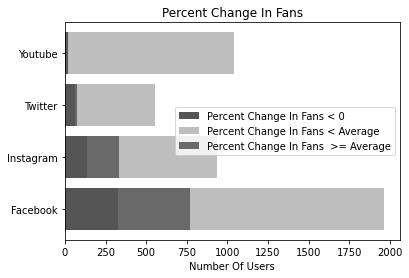

In [389]:
import matplotlib.pyplot as plt

Platforms = ['Facebook', 'Instagram' ,'Twitter','Youtube']

less0 = [325,137,62,20 ]
lessermean = [1638, 799,493,1018]
greatermean = [446, 198 ,10,1]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.barh(Platforms , less0 , color='#555555',label='Percent Change In Fans < 0')
ax.barh(Platforms , lessermean,left=less0, color='#bebebe', label='Percent Change In Fans < Average')
ax.barh(Platforms , greatermean ,left=less0,color='#696969',label='Percent Change In Fans  >= Average')

ax.set_yticks(Platforms)
ax.set_xlabel('Number Of Users')
ax.set_title('Percent Change In Fans')
leg = plt.legend( loc = 'center right')
plt.show()